Introduction

For our project, we will explore whether we can predict which of three species an iris is using measurements of the plant’s flower, and which measurements are the strongest predictors of species. We will be attempting to answer the question, “Can an Iris plant be classified using measurements of its flower?” We will use a dataset called “Iris Species” with 150 different measurements of iris flowers. It includes length and width measurements of both the sepal and petal, and each flower was classified as either iris setosa, iris versicolor, or iris virginica. There are 50 observations of each class. 

In [ ]:
Preliminary Data exploratory analysis:

Dataset on irises was downloaded from https://www.kaggle.com/datasets/uciml/iris into a csv file and read into R with the read_csv function. Our data was also already tidy, so no wrangling was necessary to clean it. 

In [1]:
library(tidyverse)
library(tidymodels)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
iris <-read_csv("data/Iris.csv") |>
    mutate(Species = as_factor(Species))
iris

Rows: 150 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Species
dbl (5): Id, SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
6,5.4,3.9,1.7,0.4,Iris-setosa
7,4.6,3.4,1.4,0.3,Iris-setosa
8,5.0,3.4,1.5,0.2,Iris-setosa
9,4.4,2.9,1.4,0.2,Iris-setosa


We created training data by splitting the data into ⅔ for training in the table below. We generated a scatter plot on both sepal and petal width and length. After generating the plot, it is clear that petal width and length is an identifiable feature of an iris that determines its species due to its clear separation. On the other hand, the scatter plot for the sepal width and length showed clustered data points without any correlation.

In [3]:
iris_split <- initial_split(iris, prop = .66, strata = Species)  
iris_train <- training(iris_split)   
iris_test <- testing(iris_split)
iris_train

Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
6,5.4,3.9,1.7,0.4,Iris-setosa
7,4.6,3.4,1.4,0.3,Iris-setosa
8,5.0,3.4,1.5,0.2,Iris-setosa
9,4.4,2.9,1.4,0.2,Iris-setosa
12,4.8,3.4,1.6,0.2,Iris-setosa
13,4.8,3.0,1.4,0.1,Iris-setosa


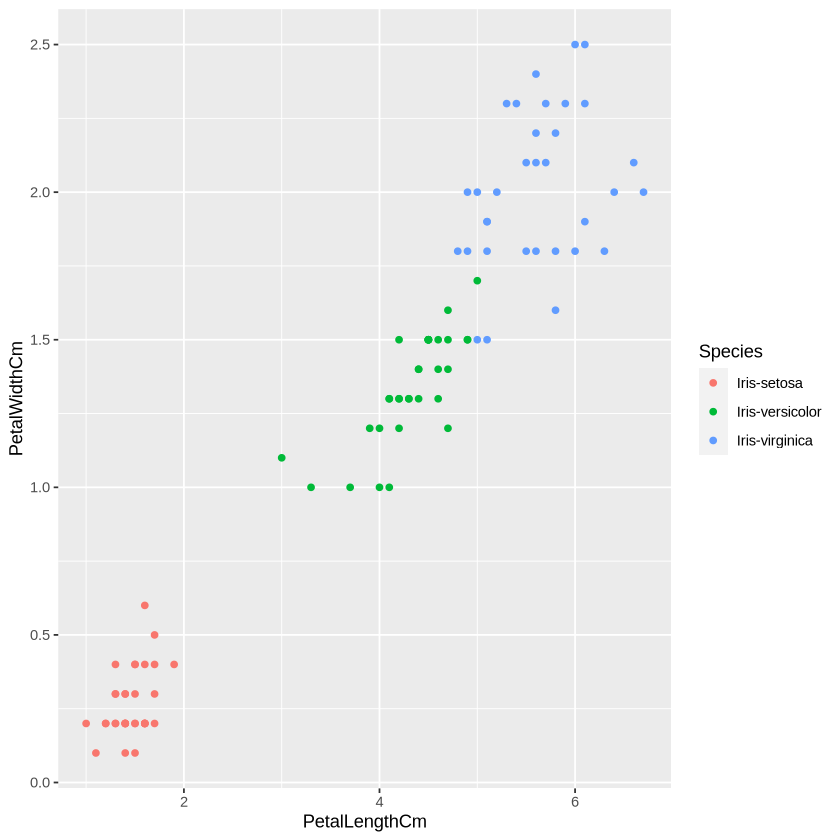

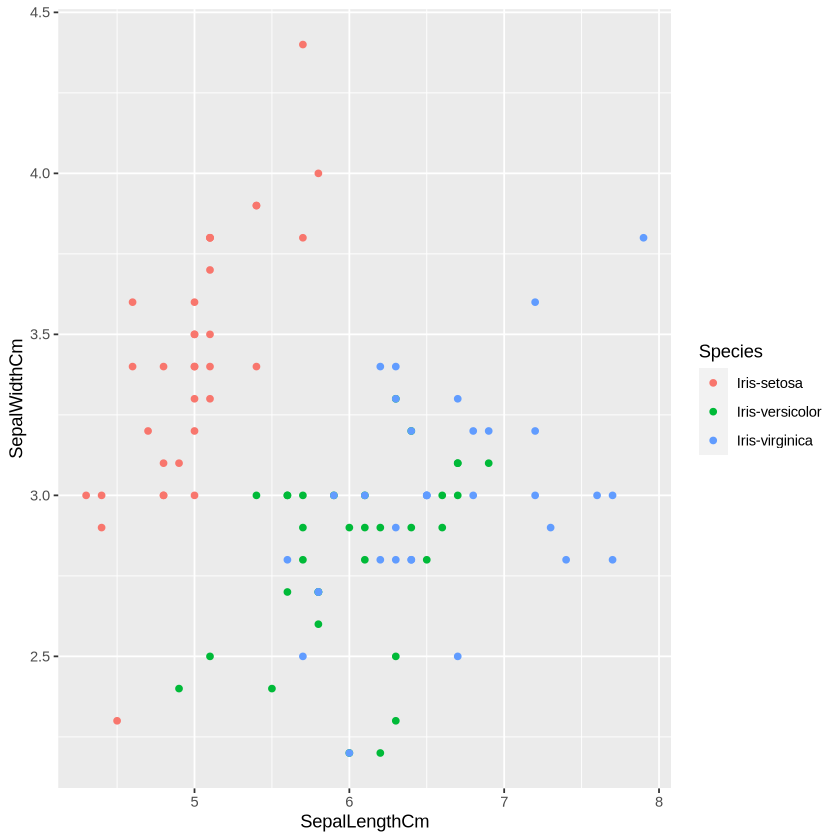

In [4]:
iris_plot <- iris_train |> 
    ggplot(aes(x = PetalLengthCm, y = PetalWidthCm, color = Species)) +
    geom_point()
iris_plot2 <- iris_train |> 
    ggplot(aes(x = SepalLengthCm, y = SepalWidthCm, color = Species)) +
    geom_point()

iris_plot
iris_plot2

In [6]:
iris |>
    select(-Id) |>
    group_by(Species) |>
    summarize(SepalLengthAvg = mean(SepalLengthCm), SepalWidthAvg = mean(SepalWidthCm), PetalLengthAvg = mean(PetalLengthCm), PetalWidthAvg = mean(PetalWidthCm))

Species,SepalLengthAvg,SepalWidthAvg,PetalLengthAvg,PetalWidthAvg
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


Methods:

To determine whether flower measurements can be used as a predictor, we will be using the observations from petal width and length since those values showed significant impact on the outcome in determining iris species. Sepal width showed no significant impact on determining iris species and sepal length showed a very weak relationship to species, so it will not be used. We will construct a classification model using ⅔ of the data for training and ⅓ for testing. We will then test our model and find its prediction precision to evaluate how successful our model is. We will visualize the data in a scatter plot

Expected Outcome and Significance:

With our classification model we expect a prediction of a setosa iris given a lower petal width and length, a versicolor iris given a medium petal width and length, and a virginica iris given a high petal width and length. We expect our model to be effective at identifying iris species because our exploratory analysis showed distinct clusters. This model is expected to be good at identifying iris species from the wild. This classification process could be expanded to other species or more measurements could be used as predictors. This would allow botantists, biologists, and those in a similar field to more accurately classify irises or even identify and distinguish new iris species.